**A/B TESTING - PROJECT **

By: Chioma Kamalu


What is A/B testing and why is it done?

A/B Testing is a statistical/experimental technique that involves analyzing two (or more) marketing strategies (variables), to choose the best marketing stretegy that can convert traffic into sales effiently and most times, at a reduced cost.


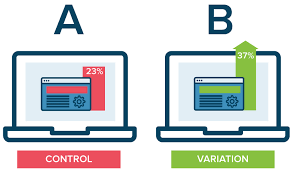

AIMS: 

A/B Testing is usually aimed at 

i) Improving Conversions- (conversion happens when a visitor takes an action or more towards purchase)

ii)  Improving CTR (Click Through Rate)

iii)   Improving ROI (Return on Investment)

TOOS USED FOR AB TESTING:

There is a long list of tools that can be used to monitor your marketing stretegy on your website or Ecommerce site. These may include but are not limited to:
- Google Analytics
- Abobe Target
- Hubspot
- Etc.

For The purpose of this project, A/B testing is being performed on data gotten from the traction on an E-commerce store as regards two Marketing strategies. Data also contains other details that can help with analysis, including the Amount of money spent on the respective strategies. Data can be found [here](https://www.kaggle.com/ilkeryildiz)


Project Aim: 
The aim of this project is to ascertain with visual proof, the strategy that created the most conversion. This will be the strategy the organisation will have to move forward with.



Imports

Importing the neccessary libraries:

In [27]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

The Data:

Reading the datasets

In [28]:
control_data = pd.read_csv("control_group.csv", sep = ";")
test_data = pd.read_csv("test_group.csv", sep = ";")

Some info on the data:

      Below are  the features in the dataset:

Campaign Name: The name of the campaign

Date: Datestamp of the record

Spend: Amount spent on the campaign in US Dollars

No of Impressions: Number of impressions the ad crossed through the campaign

Reach: The number of unique impressions received in the AD

No of Website Clicks: Number of website clicks received through the ADs 

No of Searches: Number of users who performed searches on the website 

No of View Content: Number of users who viewed content and products on the website

No of Add to Cart: Number of users who added products to the cart

No of Purchase: Number of purchases



        Two Campaigns were performed by the company:

i) Control Campaign

ii) Test Campaign


In [29]:

control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#test_data.head()
test_data.shape

(30, 10)

Data Preparation

The datasets have some unacceptable symbols in the  column names. Let’s give new column names before moving forward:

In [31]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

Checking for null values

In [32]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [33]:
test_data.isnull().sum()


Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

Replacing Null Values with the mean value in their respective columns

In [34]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), 
                                             inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(), 
                             inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), 
                                      inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), 
                                         inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), 
                                      inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), 
                                     inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), 
                                 inplace=True)

In [35]:
control_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103


Merging the datasets into a single dataframe

In [36]:
ab_data = control_data.merge(test_data, 
                             how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
print(ab_data.head(3))

      Campaign Name        Date  Amount Spent  Number of Impressions    Reach  \
0  Control Campaign   1.08.2019          2280                82702.0  56930.0   
1     Test Campaign   1.08.2019          3008                39550.0  35820.0   
2     Test Campaign  10.08.2019          2790                95054.0  79632.0   

   Website Clicks  Searches Received  Content Viewed  Added to Cart  Purchases  
0          7016.0             2290.0          2159.0         1819.0      618.0  
1          3038.0             1946.0          1069.0          894.0      255.0  
2          8125.0             2312.0          1804.0          424.0      275.0  


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/merge.py:1204: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation



In [37]:
print(ab_data["Campaign Name"].value_counts())

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64


A/B Testing to Find the Best Marketing Strategy

In [38]:
figure = px.scatter(data_frame = ab_data, 
                    x="Number of Impressions",
                    y="Amount Spent", 
                    size="Amount Spent", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

The control campaign resulted in more impressions according to the amount spent on both campaigns. 

In [39]:
label = ["Total Searches from Control Campaign", 
         "Total Searches from Test Campaign"]
counts = [int(sum(control_data["Searches Received"])), 
          int(sum(test_data["Searches Received"]))]
colors = ['pink','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Total Searches Performed ')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The test campaign resulted in more searches on the website. 

In [40]:
label = ["Website Clicks from Control Campaign", 
         "Website Clicks from Test Campaign"]
counts = [int(sum(control_data["Website Clicks"])), 
          int(sum(test_data["Website Clicks"]))]
colors = ['pink','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Website Clicks')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The test campaign wins in the number of website clicks.

In [41]:
label = ["Content Viewed from Control Campaign", 
         "Content Viewed from Test Campaign"]
counts = [int(sum(control_data["Content Viewed"])), 
          int(sum(test_data["Content Viewed"]))]
colors = ['pink','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Content Viewed')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The audience of the control campaign viewed more content than the test campaign.

In [42]:
label = ["Products Added to Cart from Control Campaign", 
         "Products Added to Cart from Test Campaign"]
counts = [sum(control_data["Added to Cart"]), 
          sum(test_data["Added to Cart"])]
colors = ['pink','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Added to Cart')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

More products were added to the cart from the control campaign regardless of the CTR.

In [43]:
label = ["Amount Spent in Control Campaign", 
         "Amount Spent in Test Campaign"]
counts = [sum(control_data["Amount Spent"]), 
          sum(test_data["Amount Spent"])]
colors = ['pink','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Amount Spent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The amount spent on the test campaign is higher than the control campaign.

In [44]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
counts = [sum(control_data["Purchases"]), 
          sum(test_data["Purchases"])]
colors = ['pink','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Purchases')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

As the Control campaign resulted in more sales, and less amount spent on marketing, the control campaign wins here!

Analyzing the metrics to find which ad campaign converts more:

In [45]:
figure = px.scatter(data_frame = ab_data, 
                    x="Content Viewed",
                    y="Website Clicks", 
                    size="Website Clicks", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. Hence the control campaign wins!

In [46]:
figure = px.scatter(data_frame = ab_data, 
                    x="Added to Cart",
                    y="Content Viewed", 
                    size="Added to Cart", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

The number of products added to the cart from the control campaign is higher. Hence, the control campaign wins!

In [47]:
figure = px.scatter(data_frame = ab_data, 
                    x="Purchases",
                    y="Added to Cart", 
                    size="Purchases", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.

Decision: 
Tips can be collected from the test campagign to particularly increase conversion rate. Utilizing this would result in even more ROI while using the control campaign 